In [1]:
%pylab inline
import pandas as pd
from scipy.optimize import curve_fit
from scipy import asarray as ar
from scipy import math
#import pylandau
import random

Populating the interactive namespace from numpy and matplotlib


# Importo il dataset

In [2]:
file = pd.read_csv(r'/Users/giulioquaglia/Downloads/Econofisica-main-3/dati_rndm_0075')
file.head()

,x,y,color,pen down?,x.1,y.1,color.1,pen down?.1,x.2,y.2,color.2,pen down?.2
0,0,1120,55,True,0,0,0,True,0,0,15,True
1,1,1002,55,True,1,34,0,True,1,84,15,True
2,2,673,55,True,2,87,0,True,2,360,15,True
3,3,588,55,True,3,143,0,True,3,389,15,True
4,4,586,55,True,4,201,0,True,4,333,15,True


In [3]:
df = file['y.2']
y = df.to_numpy()
y = y[210:]
x = ar(range(len(y)))
len(x)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.asarray is deprecated and will be removed in SciPy 2.0.0, use numpy.asarray instead
  after removing the cwd from sys.path.


742

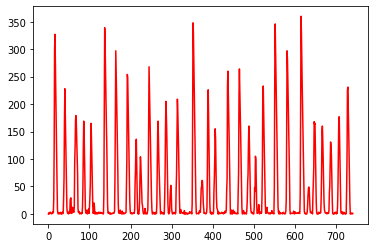

In [4]:
plt.plot(range(len(y)), y, color='r')
#plt.errorbar(range(len(soglie)), soglie, yerr=err_soglie)
plt.show()

# Definizioni Utili

## Fit Utils

In [5]:
def chiquadronorm(oss, fit, sigma, ddof, aiuto=False, norm=True):
    'funzione che calcola il chiquadrato di una distribuzione osservata rispetto a una\
    forma funzionale nota'
    
    #prende liste monodimensionali come argomenti
    scarti = []
    scartiquadri = []
    scartiquadridivisi = []
    
    for i in range(len(oss)):
        scarti.append(oss[i]-fit[i])
        scartiquadri.append(scarti[i]*scarti[i])
        scartiquadridivisi.append(scartiquadri[i]/(sigma[i]*sigma[i]))
        
        if (aiuto==True):
            print('scarti= ', scarti[i])
            print('scartiquadri= ', scartiquadri[i])
            print('scartiquadridivisi= ', scartiquadridivisi[i])
            
    chiquadro=sum(scartiquadridivisi)
    chiquadroreg=chiquadro/ddof
    
    if(norm==True):
        return (chiquadroreg)
    else:
        return (chiquadro)

def cost_chiquadronorm(oss, fit, sigma, ddof, aiuto=False, norm=True):
    'funzione che calcola il chiquadrato di una distribuzione osservata rispetto a una\
    forma funzionale nota'
    
    #prende liste monodimensionali come argomenti
    scarti = []
    scartiquadri = []
    scartiquadridivisi = []
    
    for i in range(len(oss)):
        scarti.append(oss[i]-fit)
        scartiquadri.append(scarti[i]*scarti[i])
        scartiquadridivisi.append(scartiquadri[i]/(sigma[i]*sigma[i]))
        
        if (aiuto==True):
            print('scarti= ', scarti[i])
            print('scartiquadri= ', scartiquadri[i])
            print('scartiquadridivisi= ', scartiquadridivisi[i])
            
    chiquadro=sum(scartiquadridivisi)
    chiquadroreg=chiquadro/ddof
    
    if(norm==True):
        return (chiquadroreg)
    else:
        return (chiquadro)

    
def media_pesata(x, sigma):
    numeratore = 0
    denominatore = 0
    for i in range(len(x)):
        numeratore += x[i]/(sigma[i]**2)
        denominatore += 1/(sigma[i]**2)
    return numeratore/denominatore

def costante(x,q):
    return q

def retta(x,m,q):
    return m*x +q

def gauss(x,a,x0,sigma,baseline):
    'Ritorna array gaussiano a partire da lista x secondo i parametri a,x0,sigma'
    return (baseline + a*exp(-(x-x0)**2/(2*sigma*sigma)))


def lore(x, a, x0, y0, baseline):
    'Ritorna array lorentziano a partire da lista x secondo i parametri a,x0,yo'
    return (baseline + a*(y0/(((x - x0)**2) + (y0**2))))

def fattoriale(x):
    temp_list = []

    for ics in x:
        f=1
        for i in range(1,ics+1):
            f*=i
        temp_list.append(f)
    return(temp_list)

def poisson(x, a, media, baseline):
    result = baseline + a*(media**x)*np.exp(-media)/fattoriale(x)
    return(result)

def landau(x, mpv, eta, A, baseline):
    x=double(x)
    'Ritorna array landauiano a partire da lista x secondo i parametri suoi'
    return (baseline + double(pylandau.landau(x, mpv=mpv, eta=eta, A=A)))

## Selecting Spikes

In [6]:
def isola_spikes (y, datiesterni):
    
    rivolte_diz = {}
    temp_rivolta_list = []
    rivolte_counter = 0
    cerarivolta = False
    
    for i in range(len(y)):
        
        ##aggiustato a 12 per non avere rivoltini
        if y[i] > 12:
            temp_rivolta_list.append(y[i])
            if cerarivolta == False:
                rivolte_counter += 1
                cerarivolta = True
        else:
            if cerarivolta == True:
                lunghezza=len(temp_rivolta_list)
                if rivolte_counter > 1:
                    if datiesterni == 1:
                        temp_rivolta_list.insert(0, y[i-lunghezza-1])
                    if datiesterni == 2:
                        temp_rivolta_list.insert(0, y[i-lunghezza-1])
                        temp_rivolta_list.insert(0, y[i-lunghezza-2])
                    if datiesterni == 3:
                        temp_rivolta_list.insert(0, y[i-lunghezza-1])
                        temp_rivolta_list.insert(0, y[i-lunghezza-2])
                        temp_rivolta_list.insert(0, y[i-lunghezza-3])
                else:
                    if datiesterni == 1:
                        temp_rivolta_list.insert(0, 0)
                    if datiesterni == 2:
                        temp_rivolta_list.insert(0, 0)
                        temp_rivolta_list.insert(0, 0)
                    if datiesterni == 3:
                        temp_rivolta_list.insert(0, 0)
                        temp_rivolta_list.insert(0, 0)
                        temp_rivolta_list.insert(0, 0)
                    
                if datiesterni == 1:
                        temp_rivolta_list.append(y[i])
                if datiesterni == 2:
                        temp_rivolta_list.append(y[i])
                        temp_rivolta_list.append(y[i+1])
                if datiesterni == 3:
                        temp_rivolta_list.append(y[i])
                        temp_rivolta_list.append(y[i+1])
                        temp_rivolta_list.append(y[i+2])
                
                rivolte_diz[str(rivolte_counter)+'_rivolta'] = temp_rivolta_list
                temp_rivolta_list = []
                cerarivolta = False
                
    return rivolte_diz

# Analisi

## Creo dizionario delle rivolte

In [7]:
rivolte_dict = isola_spikes(y, 2)

## Seleziono N spikes a caso

In [8]:
N = 5
choosen_list = random.sample(list(rivolte_dict.keys()), k=N)
choosen_list

['7_rivolta', '18_rivolta', '36_rivolta', '14_rivolta', '10_rivolta']

In [9]:
#bellerivolte = ['5_rivolta', '15_rivolta', '3_rivolta', '7_rivolta', '18_rivolta']

In [10]:
#choosen_list = bellerivolte

## Fit Gauss&Lore con Chiqudrati

amplitude: 2745.669411231298
mean: 6695776.065392744
y0: -4697.961242854889
baseline: 4.049749800872092
errore:  [ 1.          1.          5.29150262 10.81665383 17.29161647 18.08314132
 16.46207763 14.89966443 13.03840481 10.77032961  7.48331477  2.82842712
  1.41421356]
amplitude: -1996.56625274799
mean: 4263401.236978501
y0: -5984.279866173083
baseline: 4.719431362768958
errore:  [ 1.          1.          5.38516481  8.06225775 12.72792206 15.09966887
 13.52774926 12.          9.59166305  6.244998    3.16227766  1.73205081]
amplitude: -10976.161917439247
mean: -35178395.74594753
y0: -62417.65123631655
baseline: 2.492021438310878
errore:  [2.23606798 1.         5.         5.38516481 5.38516481 1.
 1.41421356]
amplitude: -2580.9622411538317
mean: -834640.1866480038
y0: -20500.29068740742
baseline: 11.712908252527825
errore:  [ 2.23606798  1.73205081  3.60555128  9.79795897 11.09053651 13.07669683
 13.37908816 12.76714533 11.61895004 10.39230485  8.60232527  3.16227766
  1.73205081]
am

amplitude: 2147.170766987038
mean: -379230.788872204
y0: 10448.150092299751
baseline: 4.148018338924607
errore:  [ 1.41421356  1.          4.          7.21110255 10.86278049 13.26649916
 13.3041347  11.61895004  9.64365076  6.55743852  2.          1.        ]
amplitude: -3942.4749773468693
mean: 17544401.3139036
y0: 82182.94105786773
baseline: 3.027032148905883
errore:  [ 1.          1.          6.63324958 10.14889157 15.         15.19868415
 14.         12.40967365 10.29563014  7.87400787  4.24264069  1.
  1.41421356]


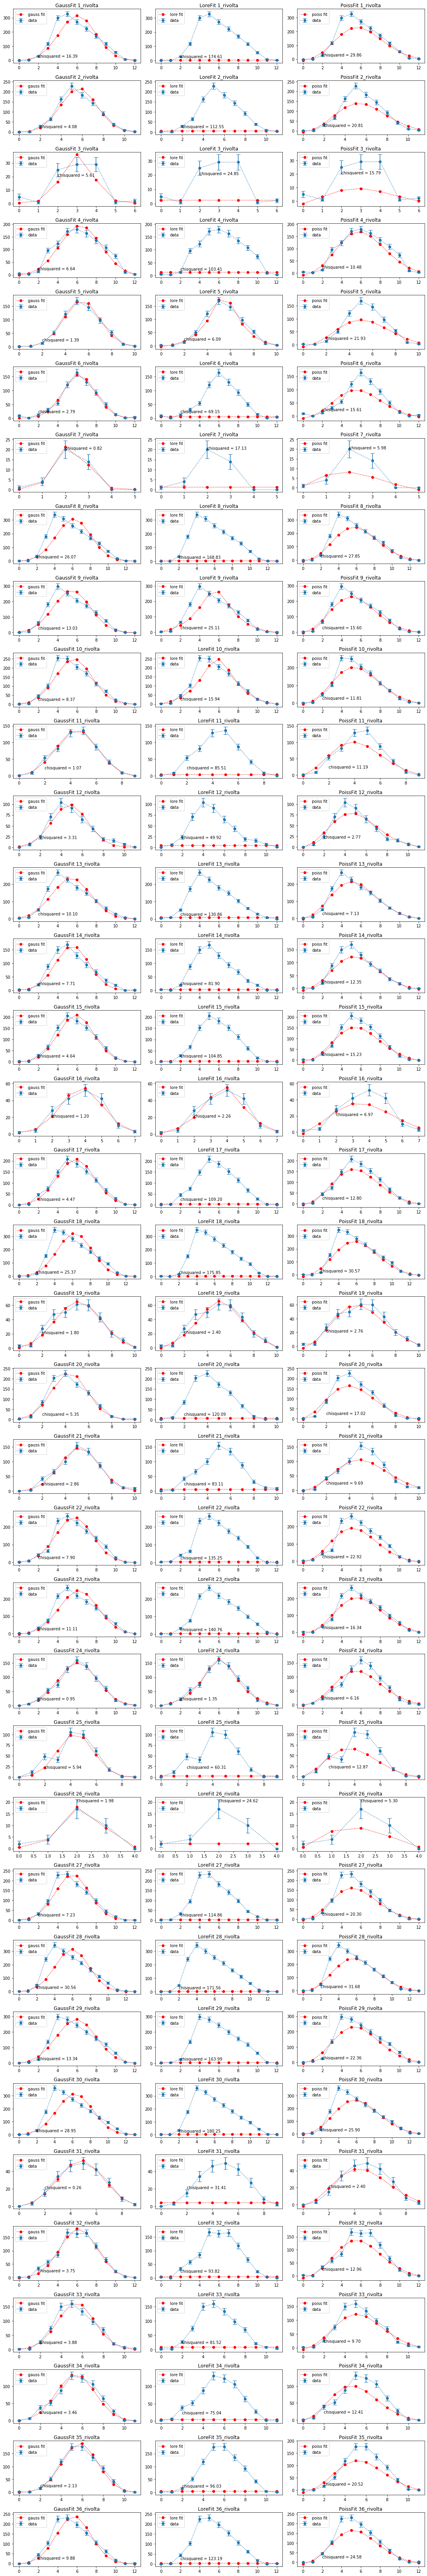

In [41]:
fig, ax = plt.subplots(nrows=len(rivolte_dict.keys()), ncols=3, figsize=(15,90))

gauss_chisq_list = []
lore_chisq_list = []
poiss_chisq_list = []

for i, rivolta in enumerate(rivolte_dict.keys()):
    
    y = rivolte_dict[rivolta]
    x = range(len(y))
    ##computo errore come radice dei conteggi
    sigma_gauss = np.where(np.sqrt(y)==0,1,np.sqrt(y))
    ##computo errore come larghezza a metà altezza
    #sigma_gauss = 2*sqrt(np.abs(gauss_params[2]*gauss_params[2]*2*log(2)))
    gauss_params,gauss_cov = curve_fit(gauss,x,y,p0=[200.,3.,2.5,0],sigma=sigma_gauss)
    gauss_red_chisq = chiquadronorm(y, gauss(x,*gauss_params), sigma_gauss, len(y)-len(gauss_params), norm=True)
    gauss_chisq_list.append(gauss_red_chisq)
    #print('amplitude:', gauss_params[0])
    #print('mean:', gauss_params[1])
    #print('sigma:', gauss_params[2])
    #print('baseline: ', gauss_params[3])
    #print('errore: ', sigma_gauss)
    
    sigma_lore = sigma_gauss
    lore_params,lore_cov = curve_fit(lore,x,y,p0=[-1000,4,-3000,5],sigma=sigma_gauss)
    lore_red_chisq = chiquadronorm(y, lore(x,*lore_params), sigma_lore, len(y)-len(lore_params), norm=True)
    lore_chisq_list.append(lore_red_chisq)
    #print('amplitude:', lore_params[0])
    #print('mean:', lore_params[1])
    #print('y0:', lore_params[2])
    #print('baseline:', lore_params[3])
    #print('errore: ', sigma_lore)
    
    sigma_poiss = sigma_gauss 
    poiss_params,poiss_cov = curve_fit(poisson,x,y, p0=[400.,3.,0], sigma=sigma_poiss)
    poiss_red_chisq = chiquadronorm(y, poisson(x, *poiss_params), sigma_poiss, len(y)-len(poiss_params), norm=True)
    poiss_chisq_list.append(poiss_red_chisq)
    #print('amplitude:', poiss_params[0])
    #print('mean:', poiss_params[1])
    #print('errore: ', sigma_poiss)
    
    #landau_params, landau_cov = curve_fit(landau, x, y, p0=[3,5,100,0], sigma=sigma_gauss)
    #landau_red_chisq = chiquadronorm(y, landau(x,*landau_params), sigma_gauss, len(y)-len(landau_params), norm=True)
    
    x_cont = np.linspace(x[0], x[-1], 100)
    
    #ax[i][0].errorbar(x,y,yerr=np.sqrt(y),fmt='o:',uplims=True, lolims=True,label='data')
    ax[i][0].errorbar(x,y,yerr=np.sqrt(y),fmt='o:',solid_capstyle='projecting',capsize=5,label='data')
    ax[i][0].plot(x,gauss(x,*gauss_params),'ro:',label='gauss fit')
    ax[i][0].legend(loc='upper left')
    ax[i][0].text(2,20,'chisquared = %.2f' % (gauss_red_chisq))
    ax[i][0].title.set_text('GaussFit ' + rivolta)
    
    ax[i][1].errorbar(x,y,yerr=np.sqrt(y),fmt='o:',solid_capstyle='projecting',capsize=5,label='data')
    ax[i][1].plot(x,lore(x,*lore_params),'ro:',label='lore fit')
    ax[i][1].legend(loc='upper left')
    ax[i][1].text(2,20,'chisquared = %.2f' % (lore_red_chisq))
    ax[i][1].title.set_text('LoreFit ' + rivolta)
    
    ax[i][2].errorbar(x,y,yerr=np.sqrt(y),fmt='o:',solid_capstyle='projecting',capsize=5,label='data')
    ax[i][2].plot(x,poisson(x,*poiss_params),'ro:',label='poiss fit')
    ax[i][2].legend(loc='upper left')
    ax[i][2].text(2,20,'chisquared = %.2f' % (poiss_red_chisq))
    ax[i][2].title.set_text('PoissFit ' + rivolta)
    
    #ax[i][3].plot(x,y,'b+:',label='data')
    #ax[i][3].plot(x,landau(x,*landau_params),'ro:',label='landa fit')
    #ax[i][3].legend(loc='upper left')
    #ax[i][3].text(2,20,'chisquared = %.2f' % (landau_red_chisq))
    #ax[i][3].title.set_text('LandaFit ' + rivolta)

fig.tight_layout()
plt.show()

**What's the best function in depicting data?**

In [24]:
## Printing how many times each function had the best chi squared
gauss_score = 0
lore_score = 0
poiss_score = 0
for i in range(len(gauss_chisq_list)):
    if gauss_chisq_list[i]  < poiss_chisq_list[i]:
        gauss_score+=1
    else:
        poiss_score+=1
        
print('Gauss %score:', gauss_score/len(gauss_chisq_list))
print('Lore %score:', lore_score/len(lore_chisq_list))
print('Poiss %score:', poiss_score/len(poiss_chisq_list))

Gauss %score: 0.9166666666666666
Lore %score: 0.0
Poiss %score: 0.08333333333333333


In [25]:
np.argmax(gauss_chisq_list)

27

In [26]:
np.argmin(poiss_chisq_list)

30

# Valore Soglia  
**HP: sono funzioni gaussiane**  
Tra le funzioni provate il miglior chiquadro ridotto è sempre della gaussiana  
Il chiquadro ridotto > 1 ci indica  
-  che la gaussiana può non essere la forma migliore per rappresentare il fenomeno
-  che sto sottostimando gli errori  
  
Vogliamo stimare il valore di soglia per le rivolte.  
Al posto che calcolare l'errore sulla soglia propagando gli errori sui parametri del fit  
[soglia = f(media-sigma)]  
stimiamo l'errore sulla singola soglia come f(media-1.2xsigma)-f(media-0.8xsigma), per tenere in considerazione la differenza dei miei dati dalla gaussiana nella fase di ascesa

In [15]:
##calcolo soglie come f(media-sigma) e errore come f(media-1.2*sigma)-f(media-0.8*sigma)
soglie = []
err_soglie = []
for i, rivolta in enumerate(rivolte_dict.keys()):
    
    y = rivolte_dict[rivolta]
    x = range(len(y))
    ##computo errore come radice dei conteggi
    sigma_gauss = np.where(np.sqrt(y)==0,1,np.sqrt(y))
    
    gauss_params,gauss_cov = curve_fit(gauss,x,y,p0=[200.,3.,2.5,0],sigma=sigma_gauss)
    gauss_red_chisq = chiquadronorm(y, gauss(x,*gauss_params), sigma_gauss, len(y)-len(gauss_params), norm=True)
    soglia = gauss(gauss_params[1] - gauss_params[2], *gauss_params)
    errore = gauss(gauss_params[1] - 1.2*gauss_params[2], *gauss_params) - gauss(gauss_params[1] - 0.8*gauss_params[2], *gauss_params)
    #print(gauss_params[-1])
    soglie.append(soglia)
    err_soglie.append(np.abs(errore))
#soglie = soglie[12:25]
#err_soglie = err_soglie[12:25]
print(soglie)
print(len(soglie))




[190.44352404095997, 131.4093600304118, 22.304238084071105, 116.3175966005046, 104.08146419305548, 95.44752021920937, 14.144773353150406, 185.8155160888029, 164.0444525267746, 151.26051123237673, 83.02747444170308, 60.43287531746186, 142.7072458831914, 99.86662403371369, 126.44656291362467, 34.07639621031634, 125.46183143502493, 194.25208502236237, 38.602774848919445, 139.20331023174802, 89.40622970324264, 154.13821887805727, 148.61013770512568, 90.99039910461208, 61.944213816066615, 11.498528456055759, 140.72369943516694, 190.22776816026047, 168.64848560924358, 190.12966154081278, 31.117102887226448, 109.86152308731586, 99.69274918609194, 81.21802893918958, 115.35885928822523, 144.82646851599586]
36


## Metodo grafico  
Plotto le rivolte con relativi errori in funzione dell'ordine della rivolta,  
se il chiquadro ridotto del fit di questi valori con una costante (o retta con pendenza compatibile con 0) è minore di uno, allora posso dire che gli eventi considerati sono statisticamente indipendenti e appartenenti alla stessa distribuzione

### Provo con retta

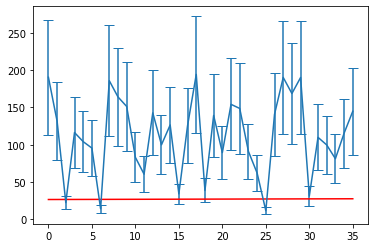

ReducedChiSquared: 3.8673989895005727


In [16]:
popt, pcov = curve_fit(retta, range(len(soglie)), soglie, sigma=err_soglie)
retta_red_chisq = chiquadronorm(soglie, retta(range(len(soglie)),*popt), err_soglie, len(soglie)-len(popt), norm=True)
plt.plot(range(len(soglie)), retta(range(len(soglie)),*popt), color='r')
plt.errorbar(range(len(soglie)), soglie, yerr=err_soglie,solid_capstyle='projecting',capsize=5)
plt.show()
print('ReducedChiSquared:', retta_red_chisq)

**Pendenza compatibile con lo zero?**

In [17]:
pendenza = popt[0]
pendenza

0.028414184196452964

In [18]:
err_pendenza = np.sqrt(pcov[0][0])
err_pendenza

0.5460689579312162

la pendenza trovata più il relativo errore comprende lo zero, allora la retta è compatibile con un valore costante,
però il chi quadro di questa distribuzione viene maggiore di uno, quindi non possiamo dire che le distribuzioni delle rivolte siano omogenee e che i dati appartengano alla stessa distribuzione statistica

### Provo con costante

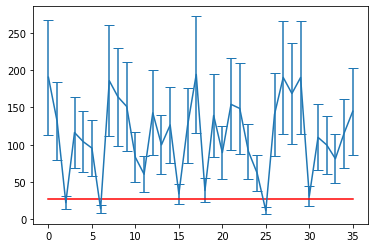

ReducedChiSquared: 3.757201048992746


In [19]:
popt, pcov = curve_fit(costante, range(len(soglie)), soglie, sigma=err_soglie)
cost_red_chisq = cost_chiquadronorm(soglie, costante(range(len(soglie)),*popt), err_soglie, len(soglie)-len(popt), norm=True)
plt.plot(range(len(soglie)), [costante(range(len(soglie)),*popt) for k in range(len(soglie))], color='r')
plt.errorbar(range(len(soglie)), soglie, yerr=err_soglie,solid_capstyle='projecting',capsize=5)
plt.show()
print('ReducedChiSquared:', cost_red_chisq)

In [20]:
popt ,np.sqrt(pcov)

(array([26.94302703]), array([[5.37191058]]))

Uguale come sopra.

## Metodo Numerico  
Confronto i valori delle soglie trovate (con relativo errore) con la media pesata delle soglie (con relativo errore).  
Se i valori delle singole soglie più errore intersecano il valore della media delle soglie più errore allora ogni singola è compatibile con la media trovata

In [21]:
np.mean(soglie)

112.43717252833532

In [22]:
media_pesata_soglie = media_pesata(soglie, err_soglie)
media_pesata_soglie

26.943026906138545

In [27]:
errore_media_soglie = np.sqrt(np.sum((soglie - media_pesata_soglie)**2)/(len(soglie)*(len(soglie)-1)))
errore_media_soglie

16.971986777057953

In [42]:
## Check: soglie calcolate per singole rivolte compatibili con media pesata
###ragionamento dietro implementazione:
###se la singola soglie è maggiore di media+errore_media_soglie 
###allora non voglio che soglie-errore_soglie sia maggiore di media+errore_media_soglie
###se la singola soglie è minore di media-errore_media_soglie 
###allora non voglio che soglie+errore_soglie sia minore di media-errore_media_soglie
up_bound = media_pesata_soglie + errore_media_soglie
low_bound = media_pesata_soglie - errore_media_soglie
j=0
for i in range(len(soglie)):
    if soglie[i] > up_bound:
        if soglie[i]-err_soglie[i] > up_bound:
            print('ERRORE,',i,' sta sopra')
            j+=1
    if soglie[i] < low_bound:
        if soglie[i]+err_soglie[i] < low_bound:
            print('ERRORE,',i,' sta sotto')
            j+=1
print('percentuale soglie fuori intervallo:' , (100*j)/len(soglie))            

print('FINITO')

ERRORE, 0  sta sopra
ERRORE, 1  sta sopra
ERRORE, 3  sta sopra
ERRORE, 4  sta sopra
ERRORE, 5  sta sopra
ERRORE, 7  sta sopra
ERRORE, 8  sta sopra
ERRORE, 9  sta sopra
ERRORE, 10  sta sopra
ERRORE, 12  sta sopra
ERRORE, 13  sta sopra
ERRORE, 14  sta sopra
ERRORE, 16  sta sopra
ERRORE, 17  sta sopra
ERRORE, 19  sta sopra
ERRORE, 20  sta sopra
ERRORE, 21  sta sopra
ERRORE, 22  sta sopra
ERRORE, 23  sta sopra
ERRORE, 26  sta sopra
ERRORE, 27  sta sopra
ERRORE, 28  sta sopra
ERRORE, 29  sta sopra
ERRORE, 31  sta sopra
ERRORE, 32  sta sopra
ERRORE, 33  sta sopra
ERRORE, 34  sta sopra
ERRORE, 35  sta sopra
percentuale soglie fuori intervallo: 77.77777777777777
FINITO


molti valori delle rivolte con i loro errori non stanno nell'intervallo individuato dalla media pesata delle soglie con relativo errore  

## Partendo dall'ipotesi in cui consideriamo i nostri eventi come statisticamente omogenei, allora le soglie con i relativi errori devono fittare con una costante, quindi vado a impostare il cutoff nel meccanismo di scelta della rivolta affinchè questo si verifichi (scelgo cutoff minimo tale per cui il chiquadro normalizzato<1).

In [43]:
#TOLGO LE RIVOLTINE CON MENO DI 39 ATTIVI IN MEDIA
soglia=[]
err_soglia=[]
for i in range(len(soglie)):
    if soglie[i]>39:
        soglia=np.append(soglia,soglie[i])
        err_soglia=np.append(err_soglia,err_soglie[i])
#soglia
 

## Metodo grafico  
Plotto le rivolte con relativi errori in funzione dell'ordine della rivolta,  
se il chiquadro ridotto del fit di questi valori con una costante (o retta con pendenza compatibile con 0) è minore di uno, allora posso dire che gli eventi considerati sono statisticamente indipendenti e appartenenti alla stessa distribuzione

### Provo con retta

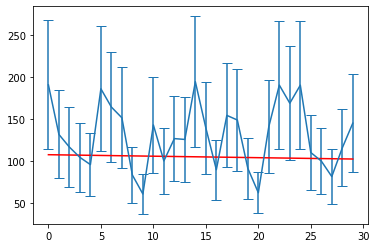

ReducedChiSquared: 0.7141112356046488


In [44]:
popt, pcov = curve_fit(retta, range(len(soglia)), soglia, sigma=err_soglia)
retta_red_chisq = chiquadronorm(soglia, retta(range(len(soglia)),*popt), err_soglia, len(soglia)-len(popt), norm=True)
plt.plot(range(len(soglia)), retta(range(len(soglia)),*popt), color='r')
plt.errorbar(range(len(soglia)), soglia, yerr=err_soglia,solid_capstyle='projecting',capsize=5)
plt.show()
print('ReducedChiSquared:', retta_red_chisq)

**Pendenza compatibile con lo zero?**

In [45]:
pendenza = popt[0]
pendenza

-0.1770687221655797

In [46]:
err_pendenza = np.sqrt(pcov[0][0])
err_pendenza

0.8270175219865714

la pendenza trovata più il relativo errore comprende lo zero, allora la retta è compatibile con un valore costante  
**Le distribuzioni delle rivolte sono omogenee, i dati appartengono alla stessa distribuzione statistica**

### Provo con costante

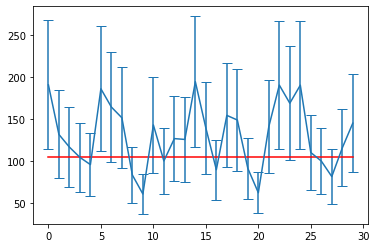

ReducedChiSquared: 0.6906155211489549


In [47]:
popt, pcov = curve_fit(costante, range(len(soglia)), soglia, sigma=err_soglia)
cost_red_chisq = cost_chiquadronorm(soglia, costante(range(len(soglia)),*popt), err_soglia, len(soglia)-len(popt), norm=True)
plt.plot(range(len(soglia)), [costante(range(len(soglia)),*popt) for k in range(len(soglia))], color='r')
plt.errorbar(range(len(soglia)), soglia, yerr=err_soglia,solid_capstyle='projecting',capsize=5)
plt.show()
print('ReducedChiSquared:', cost_red_chisq)

In [48]:
popt ,np.sqrt(pcov)

(array([104.64621693]), array([[6.72228369]]))

## Metodo Numerico  
Confronto i valori delle soglie trovate (con relativo errore) con la media pesata delle soglie (con relativo errore).  
Se i valori delle singole soglie più errore intersecano il valore della media delle soglie più errore allora ogni singola è compatibile con la media trovata

In [49]:
np.mean(soglia)

129.86647990601105

In [50]:
media_pesata_soglia = media_pesata(soglia, err_soglia)
media_pesata_soglia

104.64621690300042

In [51]:
errore_media_soglia = np.sqrt(np.sum((soglia - media_pesata_soglia)**2)/(len(soglia)*(len(soglia)-1)))
errore_media_soglia

8.549889639671154

In [53]:
## Check: soglie calcolate per singole rivolte compatibili con media pesata
###ragionamento dietro implementazione:
###se la singola soglia è maggiore di media+errore_media_soglia 
###allora non voglio che soglia-errore_soglia sia maggiore di media+errore_media_soglia
###se la singola soglia è minore di media-errore_media_soglia 
###allora non voglio che soglia+errore_soglia sia minore di media-errore_media_soglia
up_bound = media_pesata_soglia + errore_media_soglia
low_bound = media_pesata_soglia - errore_media_soglia
j=0
for i in range(len(soglia)):
    if soglia[i] > up_bound:
        if soglia[i]-err_soglia[i] > up_bound:
            print('ERRORE,',i,' sta sopra')
            j+=1
    if soglia[i] < low_bound:
        if soglia[i]+err_soglia[i] < low_bound:
            print('ERRORE,',i,' sta sotto')
            j+=1
print('percentuale soglie fuori intervallo:' , (100*j)/len(soglie))
print('FINITO')

ERRORE, 0  sta sopra
ERRORE, 9  sta sotto
ERRORE, 14  sta sopra
ERRORE, 20  sta sotto
ERRORE, 22  sta sopra
ERRORE, 24  sta sopra
percentuale soglie fuori intervallo: 16.666666666666668
FINITO
